# Modules

In [1]:
import sys
import json

with open('../paths', 'r') as f:
    globals().update(json.loads(f.read()))

sys.path.append(path_Modules_Product_)
sys.path.append(path_Modules_Toolbox_)

In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as SKPCA
from sklearn.manifold import TSNE as SKTSNE
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# main

in order to decrease covariance shift, limiting dataset to samples:
<ul>
<li>Age between 50-70</li>
<li>Sex=Male</li>
</ul>
<p>and studing following markers:</p>
'p_CA125', 'p_CA19-9', 'p_CEA', 'p_HE4', 'p_NSE', 'p_OPN', 'p_PROLACTIN',
'p_TIMP1', 'p_TIMP2', 'p_IL6', 'p_IL8', 'p_AFP','p_CA15-3'

In [4]:
ds_main = pd.read_csv(path_data_proprocessed_ + 'dataset/ds_main.csv',
                       index_col=0)
ds_main = ds_main.loc[(ds_main.s_Age.between(50, 70))
                        & (ds_main.s_Sex == 'M')]

In [7]:
markers = [
    'p_CA125', 'p_CA19-9', 'p_CEA', 'p_HE4', 'p_NSE', 'p_OPN', 'p_PROLACTIN',
    'p_IL6', 'p_AFP', 'p_CA15-3'
]

## normals intra-bias

In [8]:
ds_ = ds_main.loc[ds_main.s_Tumor=='Normal']

### dimensionality reduction

In [27]:
X_ = ds_[markers].values
pca = SKPCA(2)
y_pca = pca.fit_transform(X_)
tsne = SKTSNE(2)
y_tsne = tsne.fit_transform(X_)

_,subs=plt.subplots(1,2,figsize=(15,5))
ax=subs[0]
plt.sca(ax)
plt.plot(y_pca[:,0],y_pca[:,1],'o')
plt.title('PCA')
ax=subs[1]
plt.sca(ax)
plt.plot(y_tsne[:,0],y_tsne[:,1],'o')
plt.title('t_SNE')

Text(0.5, 1.0, 't_SNE')

#### Effect of Age 

Text(0, 0.5, '')

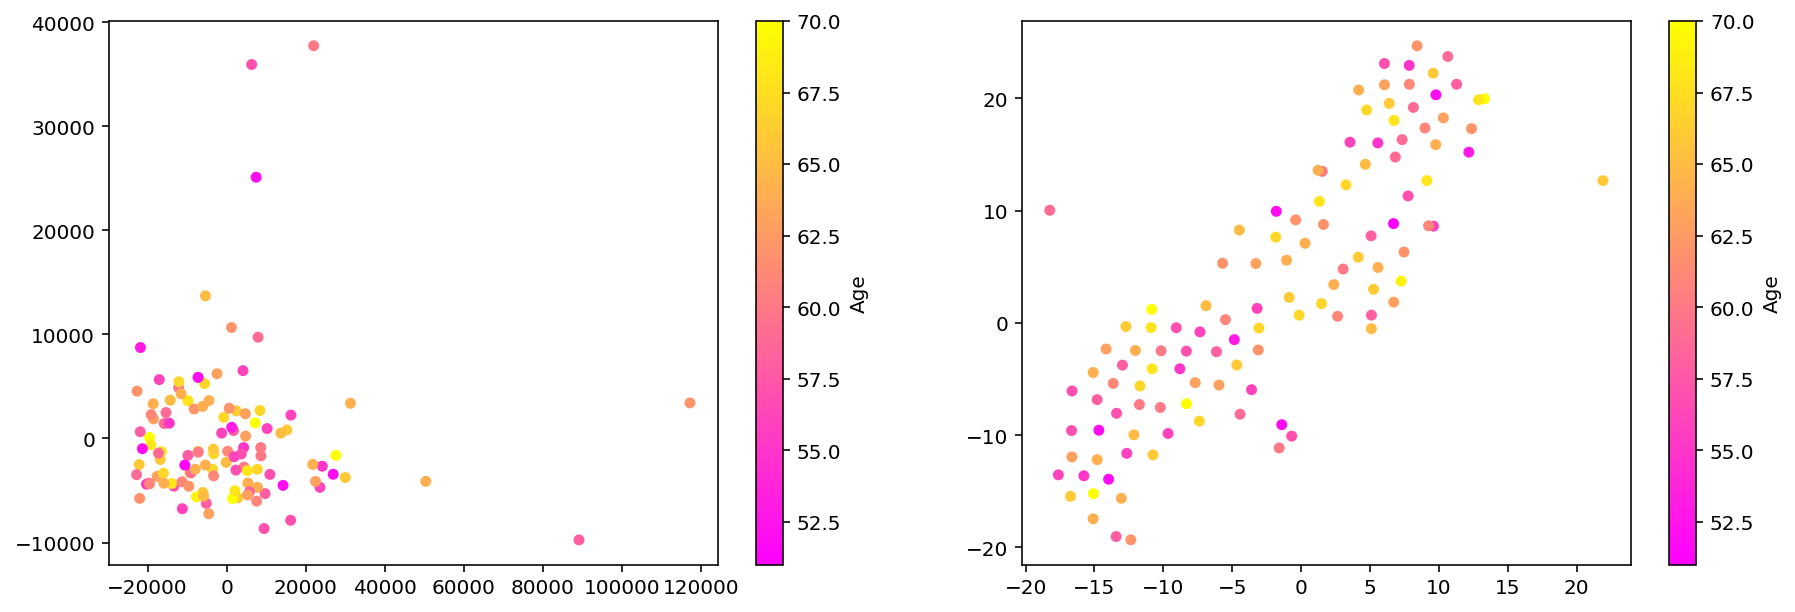

In [44]:
y_pca_ = pd.DataFrame(y_pca)
y_tsne_ = pd.DataFrame(y_tsne)
y_pca_['Age'] = ds_['s_Age'].values
y_tsne_['Age'] = ds_['s_Age'].values

_, subs = plt.subplots(1, 2, figsize=(15, 5))
ax = subs[0]
plt.sca(ax)
y_pca_.plot.scatter(0, 1, ax=ax, c='Age',colormap='spring')
plt.xlabel('')
plt.ylabel('')
ax = subs[1]
plt.sca(ax)
y_tsne_.plot.scatter(0, 1, ax=ax, c='Age',colormap='spring')
plt.xlabel('')
plt.ylabel('')

#### index sequence

In [64]:
iseq = pd.Series(
    ds_.index).apply(lambda x: x.split('_')[-1]).values.astype(int)
plt.figure(figsize=(15, 5))
plt.plot(np.arange(len(iseq)), np.sort(iseq))

In [65]:
y_pca_ = pd.DataFrame(y_pca)
y_tsne_ = pd.DataFrame(y_tsne)
y_pca_['iseq'] = iseq
y_tsne_['iseq'] = iseq

_, subs = plt.subplots(1, 2, figsize=(15, 5))
ax = subs[0]
plt.sca(ax)
y_pca_.plot.scatter(0, 1, ax=ax, c='iseq',colormap='spring')
plt.xlabel('')
plt.ylabel('')
ax = subs[1]
plt.sca(ax)
y_tsne_.plot.scatter(0, 1, ax=ax, c='iseq',colormap='spring')
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')